In [26]:
import pandas as pd
print(pd.__version__)

2.3.3


In [27]:
data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [28]:
# head() 함수
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [ ]:
# tail() 함수
data.tail()

In [ ]:
# info() 함수
data.info()

In [ ]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()

In [ ]:
#numpy np.number 속성을 사용해서 describe()
import numpy as np
data.describe(include=np.number)

In [33]:
# '전국'이 포함된 합계 행 제외
data_region_only = data[data['행정기관'].str.contains('전국') == False].copy()
# 정렬을 통해 상위 5개를 먼저 추출 (가장 인구가 많은 순서대로)
top5_data = data_region_only.sort_values(by='총인구수', ascending=False).head(5)
result = top5_data.loc[:, ['행정기관', '총인구수']].reset_index(drop=True)
result.index = result.index + 1  # 0~4인 인덱스를 1~5로 변환


print(result)

    행정기관      총인구수
1    경기도  13694685
2  서울특별시   9331828
3  부산광역시   3266598
4   경상남도   3228380
5  인천광역시   3021010


NameError: name 'data_df' is not defined

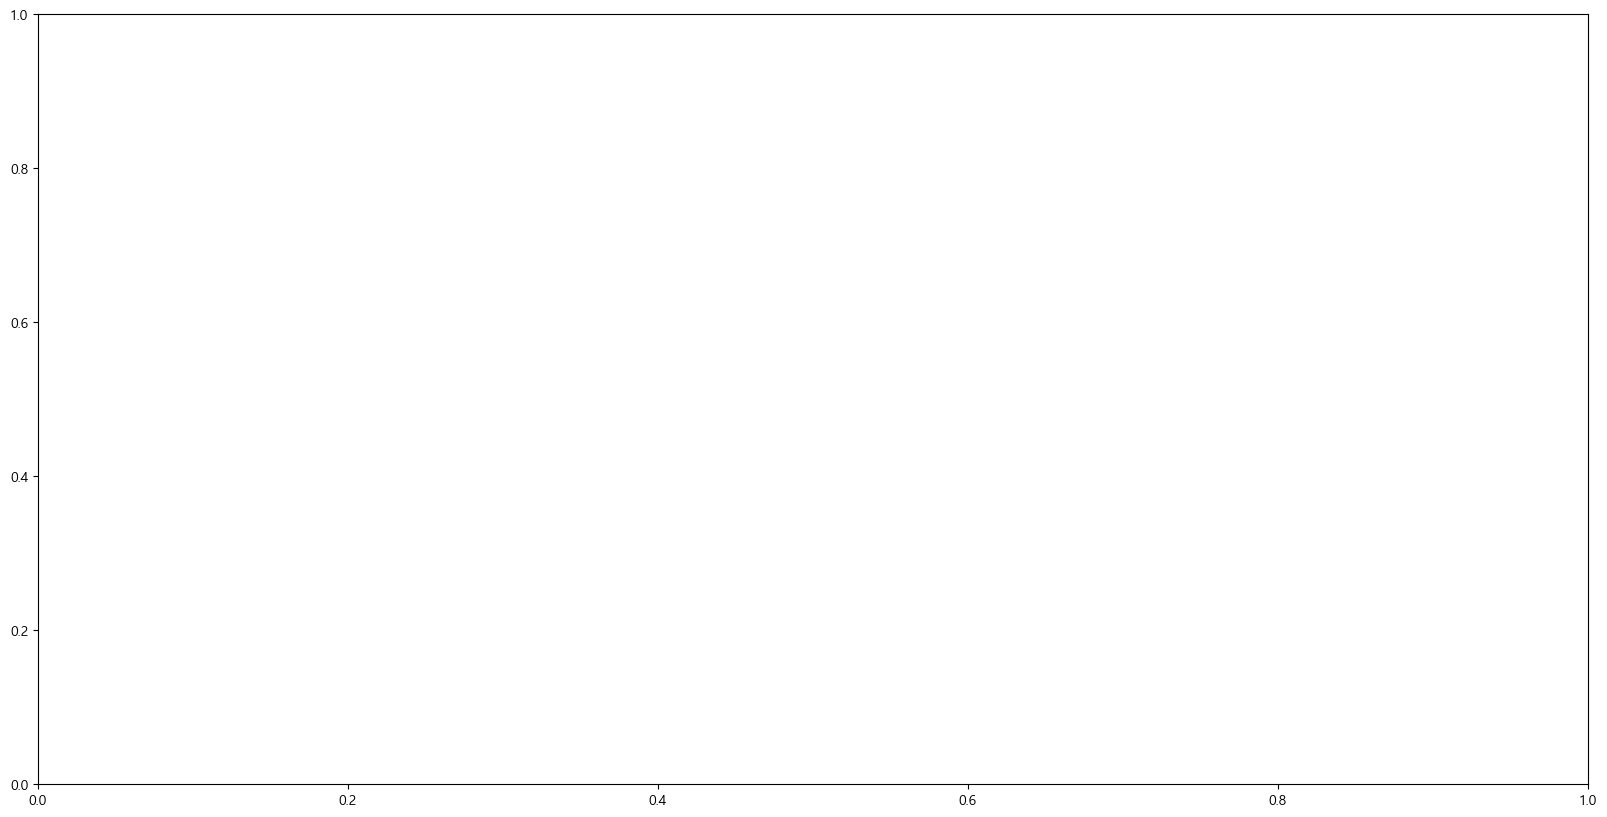

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 한글 폰트 설정 (환경에 맞게 선택)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# 2. axes 객체 생성
# 데이터의 양이 많을 수 있으므로 가로 길이를 충분히 확보합니다.
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 10)

# 3. 인구수 기준 내림차순 정렬 및 시각화
# 변수명을 'data_df' 혹은 현재 사용 중인 데이터프레임 명으로 변경하세요.
sns.barplot(
    data=data_df.sort_values(by='인구수', ascending=False), 
    x='행정구역', 
    y='인구수', 
    ax=ax, 
    hue='행정구역',
    palette='magma', # 전국 단위일 때 구분이 쉽도록 화려한 팔레트 사용
    legend=False
)

# 4. 차트 꾸미기
ax.set_title('지역별 총인구수 비교 현황', fontsize=24, pad=20)
ax.set_xlabel('지역명(행정구역)', fontsize=16)
ax.set_ylabel('인구수', fontsize=16)

# x축 글자가 겹칠 경우를 대비해 45도 회전 (지역이 많을 때 유용)
plt.xticks(rotation=45)

# 5. 출력
plt.tight_layout() # 여백 조정
plt.show()

In [ ]:
# 2. 세대당 인구수 높은 지역 Top5


      행정기관  세대당 인구
1  세종특별자치시    2.39
2      경기도    2.26
3    울산광역시    2.22
4    인천광역시    2.20
5    대구광역시    2.14


In [ ]:
# 2-2 